In [1]:
import numpy as np, matplotlib.pyplot as plt

def get_train_labels():
    from torchvision.datasets import MNIST
    from torchvision.transforms import ToTensor

    mnist_train = MNIST("./data/download", train=True, transform=ToTensor())
    return np.array([*mnist_train.targets])

def get_test_labels():
    from torchvision.datasets import MNIST
    from torchvision.transforms import ToTensor

    mnist_test = MNIST("./data/download", train=False, transform=ToTensor())
    return np.array([*mnist_test.targets])

def relabel(arr: np.ndarray, label_0: float, label_1: float) -> np.ndarray:
    return label_0 + arr * (label_1 - label_0)



In [10]:
n_train = 2500
n_test = 10000
samples = 1024

label_0, label_1 = -1, 1

train_path = f"./data/out/K_train_train_{samples}_samples_30000x30000.npy"
test_path = f"./data/out/K_test_train_{samples}_samples_10000x30000.npy"

samples_2 = 25
train_path_2 = f"./data/out/K_train_train_{samples_2}_samples_30000x30000.npy"
test_path_2 = f"./data/out/K_test_train_{samples_2}_samples_10000x30000.npy"

K_tr_tr_inv = np.linalg.inv(
    np.load(train_path)[:n_train, :n_train]
)
K_ts_tr = np.load(test_path)[:, :n_train]

# K_tr_tr_inv = np.linalg.inv(
#     (
#         samples* np.load(train_path)[:n_train, :n_train]
#         +
#         samples_2* np.load(train_path_2)[:n_train, :n_train]
#     ) / (samples_2+samples)
# )
# K_ts_tr = (
#     samples * np.load(test_path)[:, :n_train]
#     +
#     samples_2* np.load(test_path_2)[:, :n_train]
#     ) / (samples+samples_2)

Y_train = get_train_labels()[:n_train] % 2
Y_test = get_test_labels()[:n_test] % 2

Y_train = relabel(Y_train, label_0, label_1)
Y_test = relabel(Y_test, label_0, label_1)

# Apply matrix formula to get real-valued predictions
predictions = K_ts_tr @ K_tr_tr_inv @ Y_train

# Convert predictions by rounding
predictions = np.where(predictions < (label_0 + label_1) / 2, label_0, label_1)

print(predictions)
print(Y_test)

accuracy = np.mean(
    Y_test == predictions
)

print(f"Accuracy: {100*accuracy}%.")

[ 1 -1  1 ... -1  1 -1]
[ 1 -1  1 ... -1  1 -1]
Accuracy: 96.03%.


In [3]:
print(f"n samples: {samples} + {samples_2} | accuracy = {accuracy*100}%.")

n samples: 32 + 25 | accuracy = 89.58%.


# Old

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor



mnist_train = MNIST("./data/download",
                    train = True,
                    transform = ToTensor())

mnist_test = MNIST("./data/download",
                    train = False,
                    transform = ToTensor())

In [2]:
K_tr_tr = np.loadtxt("./data/out/K_train_train.csv", delimiter= ',')
K_tr_tr = K_tr_tr + np.triu(K_tr_tr, 1).T # To be deleted when main is corrected.

K_ts_tr = np.loadtxt("./data/out/K_test_train.csv", delimiter= ",")

In [3]:
indices = [0, 1]
subset = np.ix_(indices, indices)
K_tr_tr[subset]

array([[1.17087462, 0.59092433],
       [0.59092433, 1.21307837]])

In [4]:
eigvals, eigvecs = np.linalg.eigh(K_tr_tr[:5000, :5000])
eigvals

array([1.08880583e-03, 1.23254998e-03, 1.35146786e-03, ...,
       1.94864429e+02, 2.82849732e+02, 2.74060662e+03], shape=(5000,))

In [9]:
max_n = 300
n_images_test = 1013

def relabel(arr: np.ndarray, label_0: float, label_1: float) -> np.ndarray:
    return label_0 + arr * (label_1 - label_0)

def success_rate(n_images_tr, n_images_ts, tolerance: float = 0,
                 label_0: float = 0, label_1: float = 1) -> float:
    A = K_ts_tr[:, :n_images_tr]
    B = K_tr_tr[:n_images_tr, :n_images_tr]

    # Send even targets to 0 and odd targets to 1.
    Y_train = np.array([x for x in mnist_train.targets])[:n_images_tr] % 2
    Y_test = np.array([x for x in mnist_test.targets])[:n_images_ts] % 2

    # Convert even targets to label_0 and off targets to label_1.
    Y_train = relabel(Y_train, label_0, label_1)
    Y_test = relabel(Y_test, label_0, label_1)
    
    # Apply matrix formula to get real-valued predictions
    predictions = A @ np.linalg.inv(B) @ Y_train

    # Convert predictions by rounding
    predictions = np.where(predictions < (label_0 + label_1) / 2, label_0, label_1)

    print(predictions)
    print(Y_test)
    

    return np.mean(
        Y_test == predictions
    )

In [8]:
x = np.array([0,1,2])
y = np.array([0,3,2])

(x == y).mean()

np.float64(0.6666666666666666)

In [ ]:
success_rate(3000, n_images_test, label_0= 0, label_1= 1)

[1 0 1 ... 0 1 1]
[1 0 1 ... 0 1 1]


np.float64(0.9536031589338598)

In [16]:
success_rate(3000, n_images_test, label_0= -1, label_1= 1)

[ 1 -1  1 ... -1  1  1]
[ 1 -1  1 ... -1  1  1]


np.float64(0.9555774925962488)

[1 0 1 ... 0 1 1]


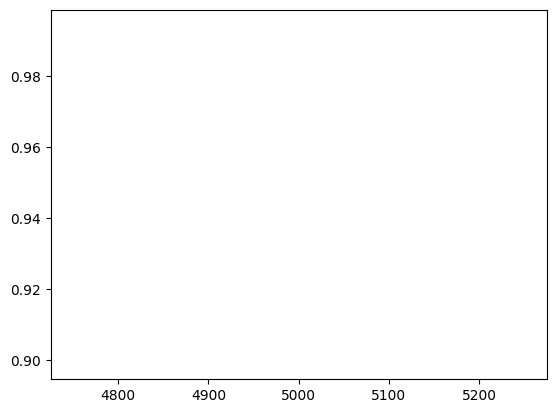

In [7]:
max_ns = np.array([5000])
ys = []
for n in max_ns:
    ys.append(success_rate(n, n_images_test))

plt.plot(max_ns, ys)
plt.show()

In [80]:
ys

[np.float64(0.7393879565646594)]

In [ ]:
predictions = A @ np.linalg.inv(B) @ Y_train

In [51]:
predictions

array([7.10755347, 0.06015539, 2.79625055, ..., 5.71666206, 1.96744021,
       7.43540055], shape=(1013,))

In [52]:
Y_test

array([7, 2, 1, ..., 4, 1, 7], shape=(1013,))

In [54]:
np.mean(
    np.abs(np.round(predictions) - Y_test) <= 1
)

np.float64(0.5903257650542941)

In [4]:
K_tr_tr.shape, K_ts_tr.shape

((10000, 10000), (1013, 10000))